In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

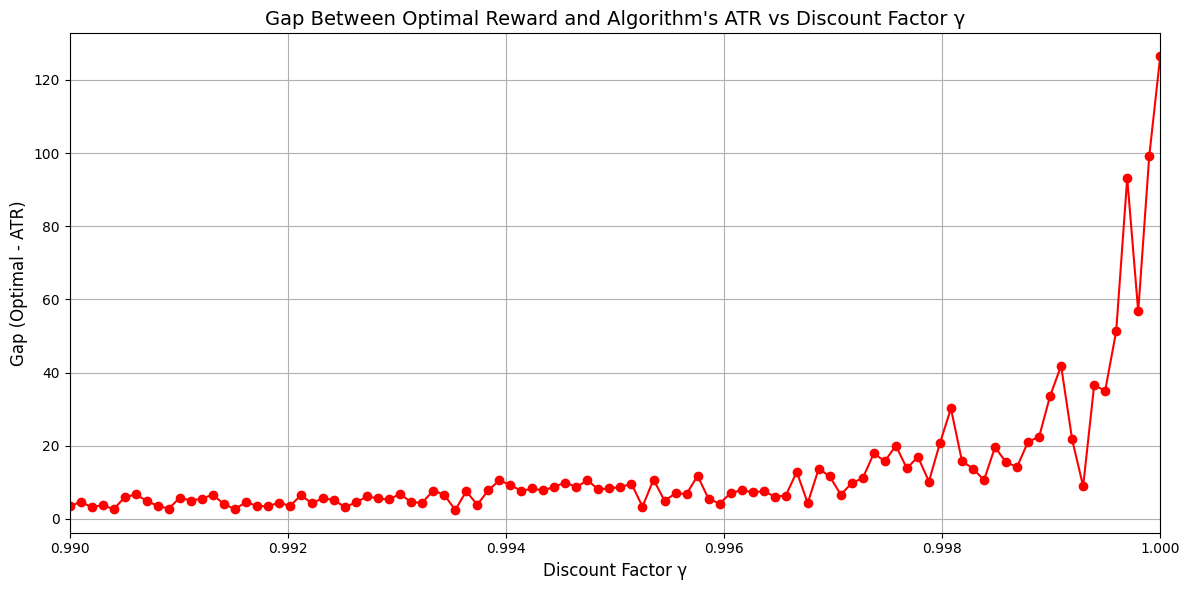

In [39]:
# Simulation parameters
true_theta = [0.3, 0.6]        # True success probabilities for arm 1 and arm 2
alpha_prior = [1, 1]           # Prior alpha parameters for Beta distributions
beta_prior = [1, 1]            # Prior beta parameters for Beta distributions
gamma_values = np.linspace(0.99, 1.00, 100)  # Gamma values
time_steps = 5000              # Number of pulls per trial
repeat_time = 50               # Number of trials per gamma

# Identify the best arm (with the highest true_theta)
best_arm = np.argmax(true_theta)
theta_best = true_theta[best_arm]

# Initialize lists to store results
gamma_list = []
gap_list = []

# Iterate over each gamma value
for gamma in gamma_values:
    total_rewards = []  # To store total rewards for each trial
    
    # Repeat the trial 'repeat_time' times for averaging
    for trial in range(repeat_time):
        # Initialize Beta parameters for each arm
        alpha = alpha_prior.copy()
        beta_params = beta_prior.copy()
        
        cumulative_reward = 0.0  # Total reward for this trial
        
        for t in range(1, time_steps + 1):
            # Calculate expected theta for each arm using current Beta posterior
            expected_theta = [alpha[i] / (alpha[i] + beta_params[i]) for i in range(2)]
            
            # Select the arm with the highest expected theta
            chosen_arm = np.argmax(expected_theta)
            
            # Simulate a pull: success with probability true_theta[chosen_arm]
            success = np.random.rand() < true_theta[chosen_arm]
            
            # Update Beta posterior based on the outcome
            if success:
                alpha[chosen_arm] += 1
                reward = gamma**(t-1)
            else:
                beta_params[chosen_arm] += 1
                reward = 0.0
            
            # Accumulate the reward
            cumulative_reward += reward
        
        total_rewards.append(cumulative_reward)
    
    # Calculate average total reward for this gamma
    avg_reward = np.mean(total_rewards)
    
    # Compute theoretical optimal reward
    if gamma < 1.0:
        # Geometric series sum: theta_best * (1 - gamma^time_steps) / (1 - gamma)
        optimal_reward = theta_best * (1 - gamma**time_steps) / (1 - gamma)
    else:
        # Handle the case when gamma = 1.0
        optimal_reward = theta_best * time_steps
    
    # Compute the gap between optimal reward and algorithm's average reward
    gap = optimal_reward - avg_reward
    
    # Store the results
    gamma_list.append(gamma)
    gap_list.append(gap)

# Convert lists to numpy arrays for easier handling
gamma_array = np.array(gamma_list)
gap_array = np.array(gap_list)

# Visualization: Gap vs Gamma
plt.figure(figsize=(12, 6))
plt.plot(gamma_array, gap_array, marker='o', linestyle='-', color='red')
plt.title('Gap Between Optimal Reward and Algorithm\'s ATR vs Discount Factor γ', fontsize=14)
plt.xlabel('Discount Factor γ', fontsize=12)
plt.ylabel('Gap (Optimal - ATR)', fontsize=12)
plt.grid(True)
plt.xlim(0.99, 1.0)
plt.tight_layout()
plt.show()